## AC

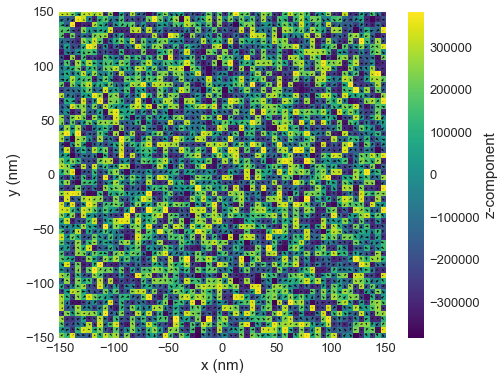

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import oommfc as oc
import discretisedfield as df
import micromagneticmodel as mm
import numpy as np
import ubermagutil.units as uu
import mag2exp
np.random.seed(1)

region = df.Region(p1=(-150e-9, -150e-9, 0), p2=(150e-9, 150e-9, 50e-9))
mesh = df.Mesh(region=region, cell=(5e-9, 5e-9, 5e-9), bc='xy')

system = mm.System(name='Box2')

system.energy = (mm.Exchange(A=4.75e-12)
                 + mm.DMI(D=0.853e-3, crystalclass='T')
                 + mm.Zeeman(H=(0,0,0)))

Ms = 384e3  # A/m

def m_fun(pos):
    return 2 * np.random.rand(3) - 1

# create system with above geometry and initial magnetisation
system.m = df.Field(mesh, dim=3, value=m_fun, norm=Ms)
system.m.plane('z').mpl()

Relax the system and plot its magnetisation.

Running OOMMF (DockerOOMMFRunner) [2021/08/06 15:40]... (16.9 s)


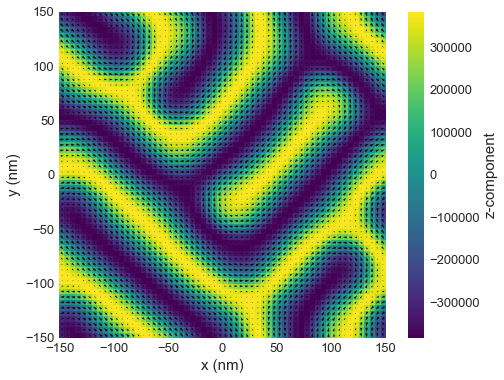

In [2]:
# minimize the energy
md = oc.MinDriver()
md.drive(system)

# Plot relaxed configuration: vectors in z-plane
system.m.plane('z').mpl()

Now we have a magnetisation texture we can compute the magnetisation of the sample.

In [3]:
hac = (0, 0, 238.7)
x_arr = np.linspace(0, 4*np.pi, 20)

In [5]:
ac = []
dc = []
for hz in np.linspace(0, 80*79577, 21):
    mz_ac = []
    for x in x_arr:
        system.energy.zeeman.H = np.array((hac[0]*np.sin(x), hac[1]*np.sin(x), hac[2]*np.sin(x))) + np.array((0, 0, hz))
        md.drive(system)
        mz_ac.append(mag2exp.magnetometry.magnetisation(system.m)[2])
    dc.append(hz)
    ac.append((np.max(mz_ac)-np.min(mz_ac))/(2*hac[2]))

Running OOMMF (DockerOOMMFRunner) [2021/08/06 15:41]... (4.6 s)
Running OOMMF (DockerOOMMFRunner) [2021/08/06 15:41]... (4.5 s)
Running OOMMF (DockerOOMMFRunner) [2021/08/06 15:41]... (4.3 s)
Running OOMMF (DockerOOMMFRunner) [2021/08/06 15:41]... (3.7 s)
Running OOMMF (DockerOOMMFRunner) [2021/08/06 15:42]... (4.3 s)
Running OOMMF (DockerOOMMFRunner) [2021/08/06 15:42]... (4.5 s)
Running OOMMF (DockerOOMMFRunner) [2021/08/06 15:42]... (4.2 s)
Running OOMMF (DockerOOMMFRunner) [2021/08/06 15:42]... (4.1 s)
Running OOMMF (DockerOOMMFRunner) [2021/08/06 15:42]... (4.0 s)
Running OOMMF (DockerOOMMFRunner) [2021/08/06 15:42]... (4.4 s)
Running OOMMF (DockerOOMMFRunner) [2021/08/06 15:42]... (4.4 s)
Running OOMMF (DockerOOMMFRunner) [2021/08/06 15:43]... (4.4 s)
Running OOMMF (DockerOOMMFRunner) [2021/08/06 15:43]... (4.0 s)
Running OOMMF (DockerOOMMFRunner) [2021/08/06 15:43]... (4.1 s)
Running OOMMF (DockerOOMMFRunner) [2021/08/06 15:43]... (4.5 s)
Running OOMMF (DockerOOMMFRunner) [2021/

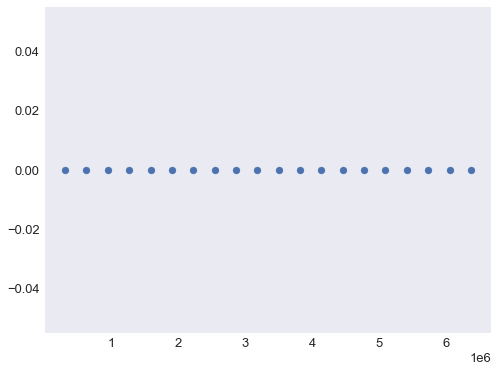

In [7]:
plt.scatter(dc[1:], ac[1:])

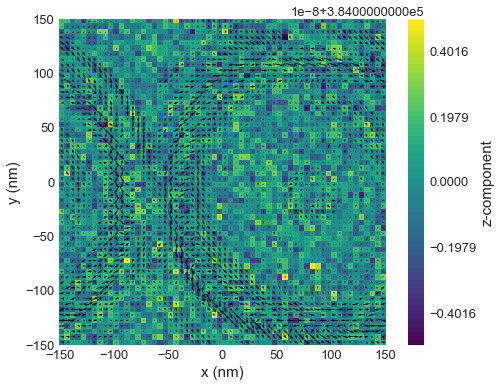

In [9]:
system.m.plane('z').mpl()

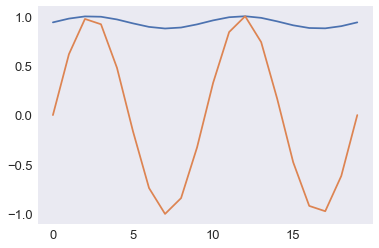

In [19]:
plt.plot(mz_ac/np.max(mz_ac))
plt.plot(hac[2]*np.sin(x_arr)/np.max(hac[2]*np.sin(x_arr)))

In [23]:
(np.max(mz_ac)-np.min(mz_ac))/(2*hac[2])

1.2374900106358115

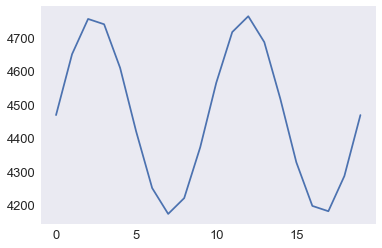

In [21]:
plt.plot(mz_ac)

In [79]:
system.table.data.head()

,max_mxHxm,E,delta_E,bracket_count,line_min_count,conjugate_cycle_count,cycle_count,cycle_sub_count,energy_calc_count,E_exchange,...,stage_max_spin_ang_exchange,run_max_spin_ang_exchange,E_dmi,E_zeeman,iteration,stage_iteration,stage,mx,my,mz
0,0.098206,-1.836022e-16,-7.395571e-32,285.0,280.0,1.0,283.0,282.0,566.0,1.552681e-16,...,30.924002,30.924002,-3.388703e-16,2.954580e-36,561.0,561.0,0.0,-0.000777,-0.001589,0.011636


In [72]:
for x in x_arr:
    np.array((hac[0]*np.sin(x), hac[1]*np.sin(x), hac[2]*np.sin(x))) + hdc

In [73]:
np.array((hac[0]*np.sin(x), hac[1]*np.sin(x), hac[2]*np.sin(x))) + hdc

array([ 0.00000000e+00,  0.00000000e+00, -1.16929276e-13])

In [32]:
system.energy.zeeman.H = (0, 0, 20*7957)

Running OOMMF (DockerOOMMFRunner) [2021/08/06 14:37]... (16.0 s)


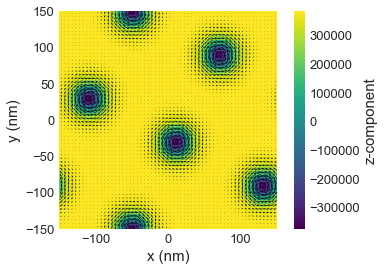

In [33]:
# minimize the energy
md = oc.MinDriver()
md.drive(system)

# Plot relaxed configuration: vectors in z-plane
system.m.plane('z').mpl()

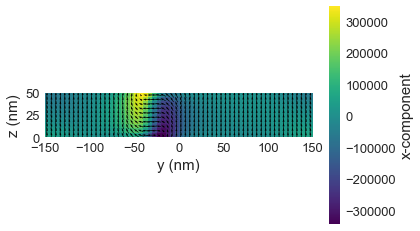

In [34]:
system.m.plane('x').mpl()